# A Tour of Probability Distributions I - Discrete Distributions

<h1>Outline</h1>

1. Random Variables
2. Discrete vs. Continuous Distributions

3. Discrete Distributions
    - Bernoulli
    - Binomial
    - Poisson
    - Negative Binomial
    - Geometric
    - Hypergeometric

Next Workbook:

4. Continuous Distributions
    - Uniform
    - Beta
    - Exponential
    - Gamma
    - Normal
    - Student's T
    - Chi-Square

# Random Variables

Before we perform an experiment, the sample outcome is not yet realized, but we could calculate the probability that a random variable $X$ will take on a given range of values. A random variable is a function mapping the sample space $S$ to the real line $\mathbb{R}$ <sup>[1]</sup>. It can take on one of many possible values from the state space, and assigns probabilities to each of the possible outcomes.

Two important properties of a probability distribution are the first and second 'moments' of the distribution. Most common distributions can be defined using few parameters and provide procedures for calculating the expected value and variance.

# Discrete vs. Continuous Random Variables

Discrete random variables are valued in a finite set, or intervals of real numbers <sup>[1]</sup>, and the probabilities are summarized by a probability mass function (PMF). Continuous distributions have an infinite number of points along an unbroken function, and the probabilities are summarized by a probability density function (PDF). Both types are said to have a cumulative density function (CDF) <sup>[2]</sup>.

# Discrete Distributions

The code below has been adapted from the PyMC library's documentation (https://www.pymc.io/projects/docs/en/stable/api/distributions.html). We'll start by importing some libraries for plotting:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import arviz as az
plt.style.use('arviz-darkgrid')
plt.rcParams['figure.figsize'] = (6,4)

## Bernoulli Distribution

The Bernoulli distribution is for binary-outcome events, and is the simplest case of the binomial distribution (where $n=1$). The probability of an event is denoted by $p$, and the complementary probability of a non-event $(1-p)$ is denoted by $q$.

<h2>PMF: $P(X = 1) = p, ~~P(X = 0) = q = 1 - p$</h2>
<h2>Expected Value: $p$</h2>
<h2>Variance: $pq$</h2>

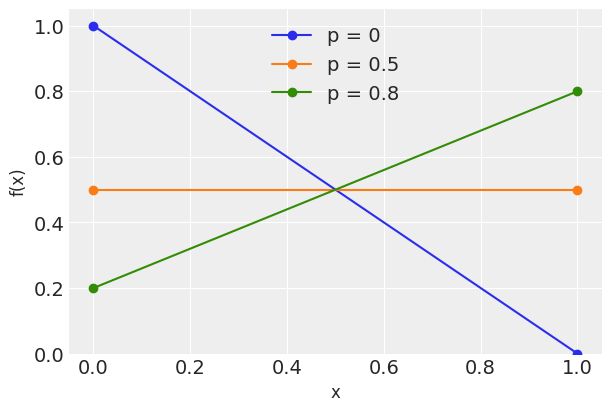

In [2]:
x = [0, 1]
for p in [0, 0.5, 0.8]:
    pmf = st.bernoulli.pmf(x, p)
    plt.plot(x, pmf, '-o', label='p = {}'.format(p))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0)
plt.legend(loc=9)
plt.show()

# Binomial Distribution

A Binomial variable $X$ is the number of successes in $n$ independent Bernoulli trials with probability $p$ of success.

<h2>PMF: $P(X = k) = \binom{n}{k} p^k q^{n-k}, ~~k \in \{0,1,2,\ldots,n\}$</h2>
<h2>Expected Value: $np$</h2>
<h2>Variance: $npq$</h2>

Example: if a hockey player takes 10 shots and each one independently has a $\frac{1}{2}$ chance of getting in, then the number of successes is distributed $Bin(10, \frac{1}{2})$.

Binomial-Poisson Relationship: $Bin(n,p)$ is approximately $Pois(\lambda)$ if $p$ is small <sup>[1]</sup>.

Binomial-Normal Relationship: $Bin(n,p)$ is approximately normal $\mathcal{N}(np, np(1-p))$ if $n$ is large and $p$ is not near $0$ or $1$ <sup>[1]</sup>.

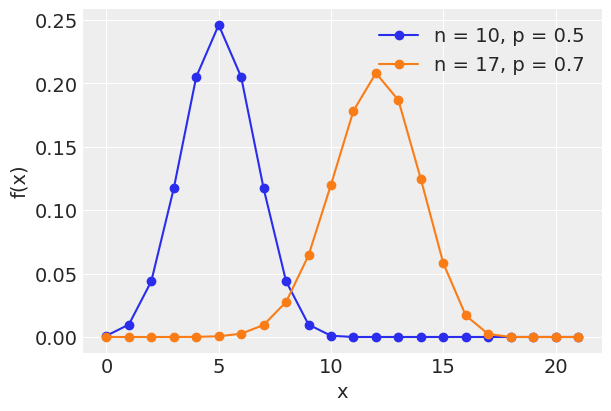

In [3]:
x = np.arange(0, 22)
ns = [10, 17]
ps = [0.5, 0.7]
for n, p in zip(ns, ps):
    pmf = st.binom.pmf(x, n, p)
    plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend(loc=1)
plt.show()

# Poisson Distribution

The Poisson distribution is derived from the Binomial distribution. It is a model for the relative frequency of rare events, with data defined as counts, and expresses the probability of a given number of events occurring in a fixed interval of time or space, in which events occur with a constant mean rate, and independently of the time since the last event.

The conditions for the Poisson are <sup>[3]</sup>:
- The number of events, $k$, occur independently
- Events occur randomly within the time interval
- The expected number of events is fixed
- The probability of an event at any point in the time interval is equal

<h2>PMF: $p(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}, ~~k \in \{0,1,2,\ldots,n\}$</h2>
<h2>Expected Value: $\lambda$</h2>
<h2>Variance: $\lambda$</h2>

(that's right, the expected value and variance are equal)

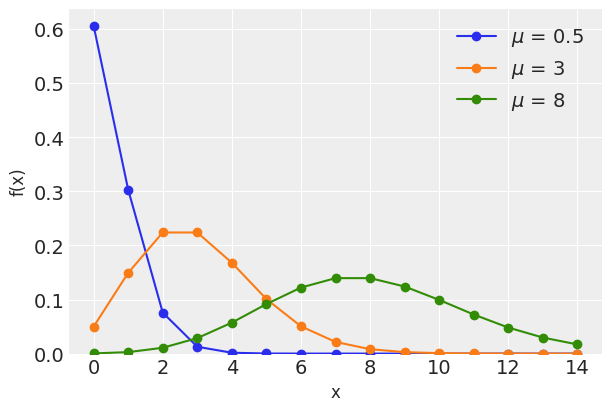

In [4]:
x = np.arange(0, 15)
for m in [0.5, 3, 8]:
    pmf = st.poisson.pmf(x, m)
    plt.plot(x, pmf, '-o', label='$\mu$ = {}'.format(m))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0)
plt.legend(loc=1)
plt.show()

# Negative Binomial Distribution

The Poisson model can be applied to count data, but the $variance = mean$ criterion is often not satisfied by real-world data. The Negative Binomial model does not make this assumption <sup>[4]</sup>.

In a sequence of independent Bernoulli trials with success probability $p$, if $X$ is the number of failures before the $r^{th}$ success, then $X$ has the Negative Binomial distribution with parameters $r$ and $p$, denoted as $X \sim Bin(r,p)$. The Binomial distribution counts the number of successes in a fixed number of trials, and the Negative Binomial counts the number of failures until a fixed number of successes <sup>[1]</sup>.

Example: A boxer has 50% accuracy and can knock out his opponent in 25 hits. The number of misses before he knocks out his opponent is distributed $NBin~(25, 0.5)$.

<h2>$P(X=n) = \binom{r+n-1}{r-1} p^r q^n, ~~n \in \{0,1,2,\ldots\}$</h2>
<h2>Expected Value: $\frac{rq}{p}$</h2>
<h2>Variance: $\frac{rq}{p^2}$</h2>

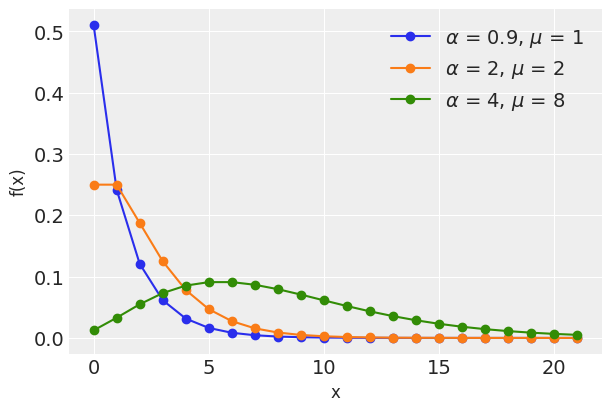

In [5]:
from scipy import special

def NegBinom(a, m, x):
    pmf = special.binom(x + a - 1, x) * (a / (m + a))**a * (m / (m + a))**x
    return pmf

x = np.arange(0, 22)
alphas = [0.9, 2, 4]
mus = [1, 2, 8]
for a, m in zip(alphas, mus):
    pmf = NegBinom(a, m, x)
    plt.plot(x, pmf, '-o', label=r'$\alpha$ = {}, $\mu$ = {}'.format(a, m))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Geometric Distribution

The Geometric distribution infers the number of Bernoulli trials before we get a success. It is often referred to as the discrete version of the Exponential distribution <sup>[5]</sup>.

Let $X$ be the number of failures before the first successful trial. Then, $X$ has the Geometric distribution with parameter $p$, denoted $X \sim Geom(p)$.

Example: if we flip a fair coin until it lands heads for the first time, then the number of tails before the first occurrence of heads is distributed $Geom(1/2)$. Each failure has probability $q=1-p$, and each success has probability $p$, so a string of $k$ failures followed by one success has probability $q^kp$ <sup>[1]</sup>.

<h2>PMF: $P(X = k) = q^kp, ~~k \in \{0,1,2,\ldots\}$</h2>
<h2>Expected Value: $\frac{q}{p}$</h2>
<h2>Variance: $\frac{q}{p^2}$</h2>

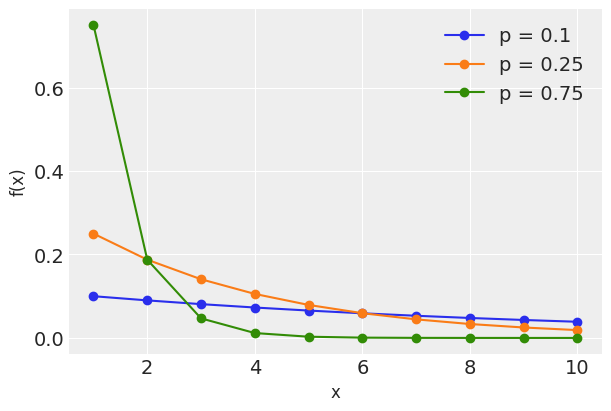

In [6]:
x = np.arange(1, 11)
for p in [0.1, 0.25, 0.75]:
    pmf = st.geom.pmf(x, p)
    plt.plot(x, pmf, '-o', label='p = {}'.format(p))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Hypergeometric Distribution

The Hypergeometric distribution measures the probability of $k$ successes in $n$ trials, sampling without replacement, given some information about the population.<sup>[6]</sup> The draw is assumed to be a simple random sample.

<h2>PMF: $P(X = k) = \frac{\binom{K}{k}\binom{N-k}{n-k}}{\binom{N}{n}}$</h2>
<ul>
    <li>$N$ is the population size</li>
    <li>$K$ is the number of success states in the population</li>
    <li>$n$ is the number of trials/draws</li>
    <li>$k$ is the number of observed successes</li>
</ul>
<h2>Expected Value: $\mu = \frac{nK}{N}$</h2>
<h2>Variance: $\frac{N-n}{N-1} ~n \frac{\mu}{n} ~\left( 1 - \frac{\mu}{n} \right)$</h2>

sources:
- Wikipedia
- https://planetmath.org/ProofOfExpectedValueOfTheHypergeometricDistribution

Example: Say you have $w$ white balls and $b$ black balls, and you draw $n$ balls without replacement. The number of white balls in your sample is $HGeom(w,b,n)$; the number of black balls is $HGeom(b,w,n)$.

<h2>$P(X = k) = \frac{ \binom{W}{k} \binom{b}{n-k} }{ \binom{w+b}{n} }$</h2>

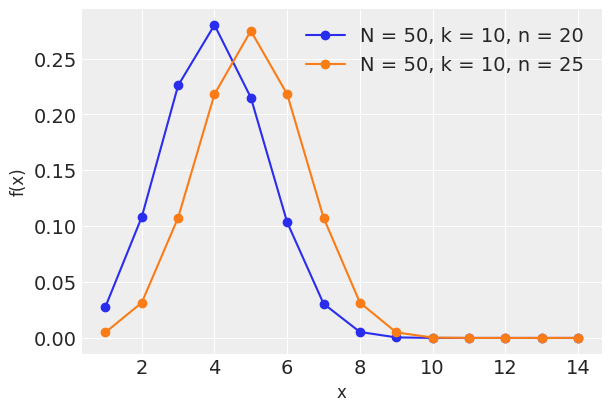

In [7]:
x = np.arange(1, 15)
N = 50
k = 10
for n in [20, 25]:
    pmf = st.hypergeom.pmf(x, N, k, n)
    plt.plot(x, pmf, '-o', label='N = {}, k = {}, n = {}'.format(N, k, n))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# References

1. Blitzstein, J. (2019). Introduction to Probability (2nd ed.). Harvard University and Stanford University. https://drive.google.com/file/d/1VmkAAGOYCTORq1wxSQqy255qLJjTNvBI/view</br>
<i>online cheat sheet:</i> https://static1.squarespace.com/static/54bf3241e4b0f0d81bf7ff36/t/55e9494fe4b011aed10e48e5/1441352015658/probability_cheatsheet.pdf

2. Brownlee, J. (2021). Probability for Machine Learning (v1.9 ed.). Dr. Jason Brownlee

3. Howell, E. (2023, June 6). Predicting the Unpredictable: An Introduction to the Poisson Distribution. Towards Data Science. https://towardsdatascience.com/predicting-the-unpredictable-an-introduction-to-the-poisson-distribution-5afd4d70b1d7

4. Date, S. (2019, September 21). An Illustrated Guide to the Poisson Regression Model. Towards Data Science. https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

5. Howell, E. (2022, August 9). Geometric Distribution Simply Explained. Towards Data Science. https://towardsdatascience.com/geometric-distribution-simply-explained-9177c816794f

6. Howell, E. (2023, June 21). Understanding The Hypergeometric Distribution. Towards Data Science. https://towardsdatascience.com/understanding-the-hypergeometric-distribution-e6540c7fec3c

7. (n.d.). PyMC API. Distributions. https://www.pymc.io/projects/docs/en/stable/api/distributions.html